In [3]:
import pandas as pd
from pathlib import Path
import requests
from api_keys import weather_api_key
from pprint import pprint
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#reading the csv files and creating dataframe 

all_indutries_df_file = pd.DataFrame(pd.read_csv("GDP_Resources/all_industries-eng.csv"))
agri_df_file = pd.DataFrame(pd.read_csv("GDP_Resources/agri_eng.csv"))
constr_df_file = pd.DataFrame(pd.read_csv("GDP_Resources/construction-eng.csv"))
energy_df_file = pd.DataFrame(pd.read_csv("GDP_Resources/energy-eng.csv"))
finance_df_file = pd.DataFrame(pd.read_csv("GDP_Resources/finance_insurance-eng.csv"))
good_df_file = pd.DataFrame(pd.read_csv("GDP_Resources/good_producing-eng.csv"))
health_df_file = pd.DataFrame(pd.read_csv("GDP_Resources/health_care-eng.csv"))

In [5]:
#dropping the empty rows from the dataframes

all_indutries_df_drop = all_indutries_df_file.dropna(how="any")
agri_df_drop = agri_df_file.dropna(how="any")
constr_df_drop = constr_df_file.dropna(how="any")
energy_df_drop = energy_df_file.dropna(how="any")
finance_df_drop = finance_df_file.dropna(how="any")
good_df_drop = good_df_file.dropna(how="any")
health_df_drop = health_df_file.dropna(how="any")

In [6]:
#renaming the columns 
all_indutries_df_clean = all_indutries_df_drop.rename(columns={
    "Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7": "Geography",
    "Unnamed: 1": "2018",
    "Unnamed: 2": "2019",
    "Unnamed: 3": "2020",
    "Unnamed: 4": "2021",
    "Unnamed: 5": "2022"
})    

agri_df_clean = agri_df_drop.rename(columns={
    "Gross domestic product (GDP) at basic prices, by industry, provinces and territories (x 1,000,000) c 1 2 3 4 5 6 7": "Geography",
    "Unnamed: 1": "2018",
    "Unnamed: 2": "2019",
    "Unnamed: 3": "2020",
    "Unnamed: 4": "2021",
    "Unnamed: 5": "2022"
})
constr_df_clean = constr_df_drop.rename(columns={
    "Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7": "Geography",
    "Unnamed: 1": "2018",
    "Unnamed: 2": "2019",
    "Unnamed: 3": "2020",
    "Unnamed: 4": "2021",
    "Unnamed: 5": "2022"
})
energy_df_clean = energy_df_drop.rename(columns={
    "Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7": "Geography",
    "Unnamed: 1": "2018",
    "Unnamed: 2": "2019",
    "Unnamed: 3": "2020",
    "Unnamed: 4": "2021",
    "Unnamed: 5": "2022"
})
finance_df_clean = finance_df_drop.rename(columns={
    "Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7": "Geography",
    "Unnamed: 1": "2018",
    "Unnamed: 2": "2019",
    "Unnamed: 3": "2020",
    "Unnamed: 4": "2021",
    "Unnamed: 5": "2022"
})
good_df_clean = good_df_drop.rename(columns={
    "Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7": "Geography",
    "Unnamed: 1": "2018",
    "Unnamed: 2": "2019",
    "Unnamed: 3": "2020",
    "Unnamed: 4": "2021",
    "Unnamed: 5": "2022"
})
health_df_clean = health_df_drop.rename(columns={
    "Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7": "Geography",
    "Unnamed: 1": "2018",
    "Unnamed: 2": "2019",
    "Unnamed: 3": "2020",
    "Unnamed: 4": "2021",
    "Unnamed: 5": "2022"
})

In [7]:
all_indutries_df = all_indutries_df_clean[1:]
agri_df = agri_df_clean[1:]
constr_df = constr_df_clean[1:]
energy_df = energy_df_clean[1:]
finance_df = finance_df_clean[1:]
good_df = good_df_clean[1:]
health_df = health_df_clean[1:]

In [8]:
# removing the commas from the numbers and changing the columns with numbers from object type to float
agri_df['2018'] = agri_df['2018'].str.replace(",","").astype(float)
agri_df['2019'] = agri_df['2019'].str.replace(",","").astype(float)
agri_df['2020'] = agri_df['2020'].str.replace(",","").astype(float)
agri_df['2021'] = agri_df['2021'].str.replace(",","").astype(float)
agri_df['2022'] = agri_df['2022'].str.replace(",","").astype(float)
#....................................................................
constr_df["2018"] = constr_df["2018"].str.replace(",","").astype(float)
constr_df["2019"] = constr_df["2019"].str.replace(",","").astype(float)
constr_df["2020"] = constr_df["2020"].str.replace(",","").astype(float)
constr_df["2021"] = constr_df["2021"].str.replace(",","").astype(float)
constr_df["2022"] = constr_df["2022"].str.replace(",","").astype(float)
#.........................................................................
energy_df["2018"] = energy_df["2018"].str.replace(",","").astype(float)
energy_df["2019"] = energy_df["2019"].str.replace(",","").astype(float)
energy_df["2020"] = energy_df["2020"].str.replace(",","").astype(float)
energy_df["2021"] = energy_df["2021"].str.replace(",","").astype(float)
energy_df["2022"] = energy_df["2022"].str.replace(",","").astype(float)
#.......................................................................
finance_df["2018"] = finance_df["2018"].str.replace(",","").astype(float)
finance_df["2019"] = finance_df["2019"].str.replace(",","").astype(float)
finance_df["2020"] = finance_df["2020"].str.replace(",","").astype(float)
finance_df["2021"] = finance_df["2021"].str.replace(",","").astype(float)
finance_df["2022"] = finance_df["2022"].str.replace(",","").astype(float)
#........................................................................
good_df["2018"] = good_df["2018"].str.replace(",","").astype(float)
good_df["2019"] = good_df["2019"].str.replace(",","").astype(float)
good_df["2020"] = good_df["2020"].str.replace(",","").astype(float)
good_df["2021"] = good_df["2021"].str.replace(",","").astype(float)
good_df["2022"] = good_df["2022"].str.replace(",","").astype(float)
#...................................................................
health_df["2018"] = health_df["2018"].str.replace(",","").astype(float)
health_df["2019"] = health_df["2019"].str.replace(",","").astype(float)
health_df["2020"] = health_df["2020"].str.replace(",","").astype(float)
health_df["2021"] = health_df["2021"].str.replace(",","").astype(float)
health_df["2022"] = health_df["2022"].str.replace(",","").astype(float)
#......................................................................
all_indutries_df["2018"] = all_indutries_df["2018"].str.replace(",","").astype(float)
all_indutries_df["2019"] = all_indutries_df["2019"].str.replace(",","").astype(float)
all_indutries_df["2020"] = all_indutries_df["2020"].str.replace(",","").astype(float)
all_indutries_df["2021"] = all_indutries_df["2021"].str.replace(",","").astype(float)
all_indutries_df["2022"] = all_indutries_df["2022"].str.replace(",","").astype(float)

C:\Users\nader\AppData\Local\Temp\ipykernel_30856\2129281120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_df['2018'] = agri_df['2018'].str.replace(",","").astype(float)
C:\Users\nader\AppData\Local\Temp\ipykernel_30856\2129281120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_df['2019'] = agri_df['2019'].str.replace(",","").astype(float)
C:\Users\nader\AppData\Local\Temp\ipykernel_30856\2129281120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [9]:
#getting the average gdp of each sector for 2018-2022
agri_df["Agri_gdp"] = agri_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
constr_df["Const_gdp"] = constr_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
energy_df["Energy_gdp"] = energy_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
finance_df["Finance_gdp"] = finance_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
good_df["Goods_gdp"] = good_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
health_df["Health_gdp"] = health_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
all_indutries_df["All_industries_gdp"] = all_indutries_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")

C:\Users\nader\AppData\Local\Temp\ipykernel_30856\562584098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_df["Agri_gdp"] = agri_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
C:\Users\nader\AppData\Local\Temp\ipykernel_30856\562584098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constr_df["Const_gdp"] = constr_df[["2018","2019","2020","2021","2022"]].mean(axis="columns")
C:\Users\nader\AppData\Local\Temp\ipykernel_30856\562584098.py:4: SettingWithCopyWarning: 
A value is try

In [10]:
#extracting the column with the mean values and the geography column for merging them into one main dataframe
agri_final = agri_df[["Geography","Agri_gdp"]]
construct_final = constr_df[["Geography","Const_gdp"]]
energy_final = energy_df[["Geography","Energy_gdp"]]
finance_final = finance_df[["Geography","Finance_gdp"]]
good_final = good_df[["Geography","Goods_gdp"]]
health_final = health_df[["Geography","Health_gdp"]]
all_industries_final = all_indutries_df[["Geography","All_industries_gdp"]]

In [11]:
#merging the dataframes to get the final dataframe
merge_1 = pd.merge(agri_final,construct_final,on=["Geography"])
merge_2 = pd.merge(merge_1,energy_final, on=["Geography"])
merge_3 = pd.merge(merge_2,finance_final, on=["Geography"])
merge_4 = pd.merge(merge_3,good_final, on=["Geography"])
merge_5 = pd.merge(merge_4,health_final, on=["Geography"])
merge_df = pd.merge(merge_5,all_industries_final, on=["Geography"])
merge_df



,Geography,Agri_gdp,Const_gdp,Energy_gdp,Finance_gdp,Goods_gdp,Health_gdp,All_industries_gdp
0,Newfoundland and Labrador,528.52,1421.62,3601.48,607.26,7370.32,1563.12,17988.74
1,Prince Edward Island,454.62,307.36,46.34,203.06,1112.74,361.58,4058.66
2,Nova Scotia,1260.74,1559.92,529.44,1464.06,4798.48,2521.62,25026.98
3,New Brunswick,1214.82,1377.34,981.10,1187.30,4878.28,1907.78,20222.20
4,Quebec,6587.66,17885.10,8469.48,15633.22,66091.60,19935.72,248755.38
5,Ontario,8218.98,35654.58,10907.40,47700.46,109385.58,30632.82,487739.52
6,Manitoba,3090.52,2664.10,2135.48,2396.52,10800.14,3543.16,40427.26
7,Saskatchewan,6524.86,3281.06,7366.30,1849.08,18400.30,3048.78,45104.72
8,Alberta,6575.74,16898.16,44273.44,8611.54,75202.48,11699.20,194436.72
9,British Columbia,6216.38,15725.52,8974.30,9908.60,40613.96,11900.72,171504.50


In [12]:
#adding a column of each province"S capital
merge_df["Capital"] = ["St. John's","Charlottetown","Halifax","Fredericton","Quebec City","Toronto","Winnipeg","Regina",
         "Edmonton","Victoria","Whitehorse","Yellowknife","Iqaluit"]

In [13]:
merge_df

,Geography,Agri_gdp,Const_gdp,Energy_gdp,Finance_gdp,Goods_gdp,Health_gdp,All_industries_gdp,Capital
0,Newfoundland and Labrador,528.52,1421.62,3601.48,607.26,7370.32,1563.12,17988.74,St. John's
1,Prince Edward Island,454.62,307.36,46.34,203.06,1112.74,361.58,4058.66,Charlottetown
2,Nova Scotia,1260.74,1559.92,529.44,1464.06,4798.48,2521.62,25026.98,Halifax
3,New Brunswick,1214.82,1377.34,981.10,1187.30,4878.28,1907.78,20222.20,Fredericton
4,Quebec,6587.66,17885.10,8469.48,15633.22,66091.60,19935.72,248755.38,Quebec City
5,Ontario,8218.98,35654.58,10907.40,47700.46,109385.58,30632.82,487739.52,Toronto
6,Manitoba,3090.52,2664.10,2135.48,2396.52,10800.14,3543.16,40427.26,Winnipeg
7,Saskatchewan,6524.86,3281.06,7366.30,1849.08,18400.30,3048.78,45104.72,Regina
8,Alberta,6575.74,16898.16,44273.44,8611.54,75202.48,11699.20,194436.72,Edmonton
9,British Columbia,6216.38,15725.52,8974.30,9908.60,40613.96,11900.72,171504.50,Victoria


In [14]:
#creating 2 cloumns for lat and long and also bulding up url for API
merge_df["Lat"] = ""
merge_df["Lon"] = ""
base_url = "https://api.openweathermap.org/data/2.5/weather?"
country_code = "CA"
api = weather_api_key
for index, row in merge_df.iterrows():
    city = row["Capital"]
    url =f"{base_url}q={city},{country_code}&appid={api}"
    response = requests.get(url).json()

    try:
        merge_df.loc[index, "Lat"] = response["coord"]["lat"]
        merge_df.loc[index, "Lon"] = response["coord"]["lon"]
    except (KeyError, IndexError):
        merge_df.loc[index, "Lat"] = "Not Found"
        merge_df.loc[index, "Lon"] = "Not Found"
merge_df       

,Geography,Agri_gdp,Const_gdp,Energy_gdp,Finance_gdp,Goods_gdp,Health_gdp,All_industries_gdp,Capital,Lat,Lon
0,Newfoundland and Labrador,528.52,1421.62,3601.48,607.26,7370.32,1563.12,17988.74,St. John's,47.5649,-52.7093
1,Prince Edward Island,454.62,307.36,46.34,203.06,1112.74,361.58,4058.66,Charlottetown,46.2352,-63.1267
2,Nova Scotia,1260.74,1559.92,529.44,1464.06,4798.48,2521.62,25026.98,Halifax,44.6453,-63.5724
3,New Brunswick,1214.82,1377.34,981.10,1187.30,4878.28,1907.78,20222.20,Fredericton,45.9454,-66.6656
4,Quebec,6587.66,17885.10,8469.48,15633.22,66091.60,19935.72,248755.38,Quebec City,46.8123,-71.2145
5,Ontario,8218.98,35654.58,10907.40,47700.46,109385.58,30632.82,487739.52,Toronto,43.7001,-79.4163
6,Manitoba,3090.52,2664.10,2135.48,2396.52,10800.14,3543.16,40427.26,Winnipeg,49.8844,-97.147
7,Saskatchewan,6524.86,3281.06,7366.30,1849.08,18400.30,3048.78,45104.72,Regina,50.4501,-104.6178
8,Alberta,6575.74,16898.16,44273.44,8611.54,75202.48,11699.20,194436.72,Edmonton,53.5501,-113.4687
9,British Columbia,6216.38,15725.52,8974.30,9908.60,40613.96,11900.72,171504.50,Victoria,48.4329,-123.3693


In [15]:
gdp_map = merge_df.hvplot.points("Lon","Lat",geo = True,tiles="CartoDark",coastline=True,scale = 0.06,color="Capital",size="All_industries_gdp",hover_cols=["Geography","Capital","All_industries_gdp"])
gdp_map

C:\Users\nader\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Points.I    :Points   [Lon,Lat]   (Capital,All_industries_gdp,Geography)
   .Coastline.I :Feature   [Longitude,Latitude]

In [16]:
hvplot.save(gdp_map, 'gdp_new.png')


In [17]:
!pip install selenium

In [19]:
on = merge_df.iloc[5,4:7].sum()
qc = merge_df.iloc[4,4:7].sum()
ab = merge_df.iloc[8,4:7].sum()

In [20]:
on_f=merge_df.iloc[5,4]
on_g=merge_df.iloc[5,5]
on_h=merge_df.iloc[5,6]
qc_f = merge_df.iloc[4,4]
qc_g = merge_df.iloc[4,5]
qc_h = merge_df.iloc[4,6]
ab_f=merge_df.iloc[8,4]
ab_g=merge_df.iloc[8,5]
ab_h=merge_df.iloc[8,6]

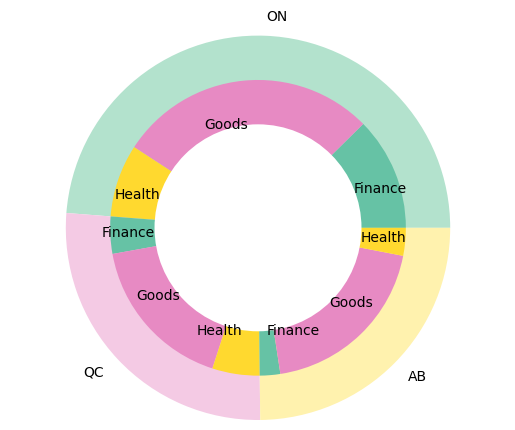

In [28]:
main = [on,qc,ab]
main_label = ["ON","QC","AB"]
sub_main = [on_f,on_g,on_h,qc_f,qc_g,qc_h,ab_f,ab_g,ab_h]
sub_lab = ["Finance","Goods","Health","Finance","Goods","Health","Finance","Goods","Health"]
colorset1 = plt.colormaps["Pastel2"]
colorset2 = plt.colormaps["Set2"]
outer_colors = colorset1([0, 3, 5])
inner_colors = colorset2([0,3,5])
fig, ax = plt.subplots()
ax.axis('equal')

outter_pie= ax.pie(main , radius=1.3, labels=main_label,colors=outer_colors)
# plt.setp(outter_pie, width=0.3, edgecolor='white')
# explode = [0.6,0.4,0.3,0.2,0.1,0.1,0,0,0,0,0,0,0]
inner_pie= ax.pie(sub_main, radius=1.3-0.3,labels=sub_lab, labeldistance=0.7,colors=inner_colors)
# plt.setp(inner_pie, width=0.1, edgecolor='white')
centre =plt.Circle((0,0),0.7, fc="white")
plt.margins(0,0)
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.legend

plt.show()